In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = "/Users/heste/Downloads/cost-2023-12-01-2024-01-01.csv"
data = pd.read_csv(file_path)

# Check the first few rows of the dataframe to understand its structure and identify the timestamp column
data.head()

timestamp currency  GPT-4 Turbo  GPT-4  GPT-3.5 Turbo  Assistants API  \
0  1701388800      usd        0.000      0         0.0000               0   
1  1701475200      usd        0.000      0         0.0000               0   
2  1701561600      usd        0.000      0         0.0000               0   
3  1701648000      usd      114.331      0        11.8495               0   
4  1701734400      usd        0.000      0         0.0000               0   

   Fine-tuning models  Embedding models  Base models  Image models  \
0                   0                 0            0             0   
1                   0                 0            0             0   
2                   0                 0            0             0   
3                   0                 0            0             0   
4                   0                 0            0             0   

   Audio models  
0             0  
1             0  
2             0  
3             0  
4             0

In [2]:
data["timestamp_jp"] = (
    pd.to_datetime(data["timestamp"], unit="s")
    .dt.tz_localize("UTC")
    .dt.tz_convert("Asia/Tokyo")
    .dt.strftime("%Y/%m/%d %H:%M:%S")
)

In [3]:
data.to_csv("/Users/heste/Downloads/cost-2023-12-01-2024-01-01-jp.csv", index=False, encoding="utf-8-sig")

In [4]:
from sn_script.config import (
    Config,
)
import pandas as pd

In [5]:
subcategory_annotation_df = pd.read_csv(
    Config.target_base_dir / "付加的情報の下位分類の集計 - data.csv"
)

In [6]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

subcategory_annotation_df["gold_str"] = subcategory_annotation_df["gold"].astype(str)
subcategory_annotation_df["chatgpt4_str"] = subcategory_annotation_df[
    "chatgpt4"
].astype(str)

# Prepare the data for accuracy and F1 score calculation with the values as strings
y_true_str = subcategory_annotation_df["gold_str"]
y_pred_str = subcategory_annotation_df["chatgpt4_str"]

# Recalculate accuracy
accuracy_str = accuracy_score(y_true_str, y_pred_str)

# Recalculate macro F1 score
macro_f1_str = f1_score(y_true_str, y_pred_str, average="macro")

# Recalculate classification report for detailed analysis (precision, recall, f1-score by class)
class_report = classification_report(y_true_str, y_pred_str, output_dict=True)

accuracy_str, macro_f1_str, class_report["macro avg"]

/Users/heste/workspace/sn-script/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/heste/workspace/sn-script/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/heste/workspace/sn-script/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5581395348837209,
 0.4434559884559885,
 {'precision': 0.5005555555555555,
  'recall': 0.4305555555555555,
  'f1-score': 0.4434559884559885,
  'support': 43.0})

In [7]:
for k, v in class_report.items():
    if isinstance(v, dict):
        print(k, v["f1-score"])

1.1 0.8000000000000002
1.2 0.0
1.4 0.75
1.5 0.5555555555555556
1.8 0.28571428571428575
2.1 0.28571428571428575
2.3 0.7272727272727272
2.4 0.3636363636363636
2.5 0.0
3.3 0.6666666666666666
macro avg 0.4434559884559885
weighted avg 0.5785764622973926


In [8]:
# accuracy, precision, recall, f1-score for each class and macro average
for k, v in class_report.items():
    if isinstance(v, dict):
        print(
            k,
            v["precision"],
            v["recall"],
            v["f1-score"],
        )

1.1 0.8 0.8 0.8000000000000002
1.2 0.0 0.0 0.0
1.4 0.75 0.75 0.75
1.5 0.5555555555555556 0.5555555555555556 0.5555555555555556
1.8 0.5 0.2 0.28571428571428575
2.1 0.2 0.5 0.28571428571428575
2.3 0.8 0.6666666666666666 0.7272727272727272
2.4 0.4 0.3333333333333333 0.3636363636363636
2.5 0.0 0.0 0.0
3.3 1.0 0.5 0.6666666666666666
macro avg 0.5005555555555555 0.4305555555555555 0.4434559884559885
weighted avg 0.6302325581395349 0.5581395348837209 0.5785764622973926


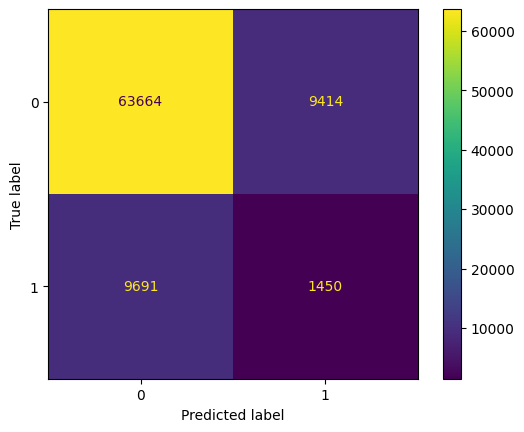

In [6]:
# アクション
import json

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

with open("/Users/heste/workspace/soccernet/sn-script/database/test/result.json") as f:
    json_data = json.load(f)

matrix = confusion_matrix(
    json_data["target_label"], json_data["predict_label"]
)
cmp = ConfusionMatrixDisplay(
    matrix,
)
cmp.plot()

In [1]:
%cd ..

/Users/heste/workspace/soccernet/sn-script


In [ ]:
import re

import pandas as pd
from SoccerNet.Downloader import getListGames

games = getListGames(task="caption")

video_team_map_csv = "database/misc/video_team_map.csv"


def extract_data_from_game(game: str):
    league, season, match_data = game.split('/')
    # regexで抽出する
    date = re.search(r'\d{4}-\d{2}-\d{2}', match_data).group()
    kickoff_time = re.search(r'\d{2}-\d{2}', match_data).group()

    # score は 空白 数字 - 数字 空白
    home_score = int(re.search(r' (\d) - \d ', match_data).group(1))
    away_score = int(re.search(r' \d - (\d) ', match_data).group(1))

    # home-team は、 kickoff_time の後から score の前まで
    home_team = re.search(r' \d{2}-\d{2} (.*) \d - \d ', match_data).group(1)
    # away-teamは、scoreの後から終わりまで
    away_team = re.search(r' \d - \d (.*)', match_data).group(1)

    return {
        "game": game,
        "home_team": home_team,
        "away_team": away_team,
    }

data_list = []
for game in games:
    data_list.append(extract_data_from_game(game))

df = pd.DataFrame(data_list)
df["1st_half_left_team"] = None
df.to_csv(video_team_map_csv, index=False, encoding="utf-8-sig")

# 作成後アノテーションする

In [4]:
# アノテーション済みのデータを読み込む
video_team_map_csv = "database/misc/video_team_map.csv"
video_team_map_df = pd.read_csv(video_team_map_csv)

result_list = []
for _, row in video_team_map_df.iterrows():
    if row["1st_half_left_team"] == row["home_team"]:
        result_1st = {
            "game": row["game"],
            "half": 1,
            "left": row["home_team"],
            "right": row["away_team"],
        }
        result_2nd = {
            "game": row["game"],
            "half": 2,
            "left": row["away_team"],
            "right": row["home_team"],
        }
    elif row["1st_half_left_team"] == row["away_team"]:
        result_1st = {
            "game": row["game"],
            "half": 1,
            "left": row["away_team"],
            "right": row["home_team"],
        }
        result_2nd = {
            "game": row["game"],
            "half": 2,
            "left": row["home_team"],
            "right": row["away_team"],
        }
    else:
        continue
    result_list.append(result_1st)
    result_list.append(result_2nd)

result_df = pd.DataFrame(result_list)
result_df.to_csv("database/misc/side_to_team.csv", index=False, encoding="utf-8-sig")
